In [ ]:
!pip install opencv-python numpy matplotlib scipy

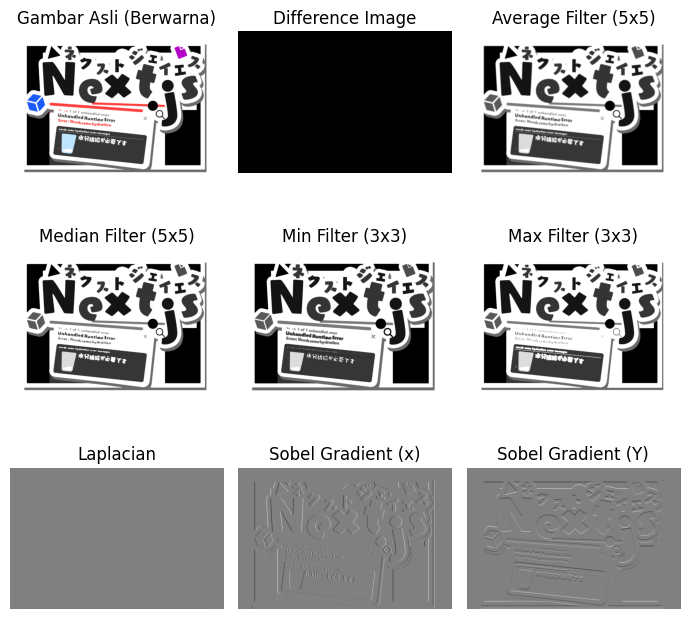

In [ ]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, minimum_filter, maximum_filter

# Baca gambar dari file dan ubah ke grayscale
image_path='/content/Next.js.png'
image_color = cv2.imread(image_path)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

def show_images_in_grid(titles, images, rows, cols, figsize=(10, 10)):
    # Tampilkan beberapa gambar dalam grid
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for ax, title, ing in zip(axes.flatten(), titles, images):
        ax.set_title(title)
        ax.imshow(ing if len(ing.shape) == 3 else ing, cmap='gray' if len(ing.shape) == 2 else None)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Hitung perbedaan gambar dengan dirinya sendiri
difference = cv2.absdiff(image_gray, image_gray)

# Filter rata-rata dengan ukuran kernel 5x5
avg_filtered = cv2.blur(image_gray, (5, 5))

# Filter median dengan ukuran kernel 5x5
median_filtered = median_filter(image_gray, size=5)

# Filter minimum dengan ukuran kernel 3x3
min_filtered = minimum_filter(image_gray, size=3)

# Filter maximum dengan ukuran kernel 3x3
max_filtered = maximum_filter(image_gray, size=3)

# Hitung laplacian
laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)

# Hitung gradient Sobel dalam arah x
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)

# Hitung gradient Sobel dalam arah y
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

# Daftar judul dan gambar untuk ditampilkan dalam grid
titles = [
    "Gambar Original",
    "Difference Image",
    "Average Filter (5x5)",
    "Median Filter (5x5)",
    "Min Filter (3x3)",
    "Max Filter (3x3)",
    "Laplacian",
    "Sobel Gradient (x)",
    "Sobel Gradient (Y)"
]

# Susun gambar dan judul dalam array
images = [
    cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB),
    difference,
    avg_filtered,
    median_filtered,
    min_filtered,
    max_filtered,
    laplacian,
    sobel_x,
    sobel_y
]

# Tampilkan gambar dalam grid 3x3
show_images_in_grid(titles, images, 3, 3, figsize=(7,7))